In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

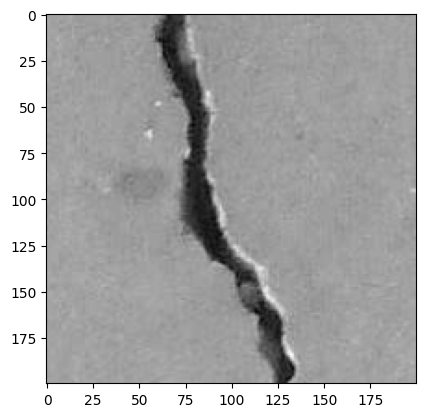

In [4]:
datadir = "D:\Downloads\Surface crack detection"
categories = ["positive", "negative"]
img_size = 200
for category in categories:
    path = os.path.join(datadir,category) #path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size,img_size))
        plt.imshow(new_array, cmap="gray")
        plt.show()
        break
    break



In [5]:
print(new_array.shape)

(200, 200)


In [6]:
training_data = []

def create_training_data():
    for category in categories:                 #iterating through categories (pos and neg)
        path = os.path.join(datadir,category)   #path
        class_num = categories.index(category)  #0 and 1 for negatove positive
        for img in os.listdir(path):            #iterating through images in each category
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)    #reading pixels and assigning grayscale
                new_array = cv2.resize(img_array, (img_size,img_size))                  #resizing image
                training_data.append([new_array,class_num])                             #appending trainng data
            except Exception as e:
                pass

create_training_data()

In [7]:
print(len(training_data))

40000


In [8]:
import random
random.shuffle(training_data)

In [9]:
X = []
y = []


In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size,img_size,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

# X = pickle.load(open("X.pickle", "rb"))
# y = pickle.load(open("y.pickle", "rb"))

X = np.array(X/255.0)

y = np.array(y).reshape(-1,1)
y = np.array(y)
print(y.shape)

In [ ]:
model = Sequential()

model.add(Conv2D((32), (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D((32), (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
)

history = model.fit(X, y, batch_size = 32, validation_split=0.3, epochs=5)

Epoch 1/5
875/875 [==============================] - 159s 172ms/step - loss: 0.0831 - accuracy: 0.9711 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 2/5
875/875 [==============================] - 87s 99ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0322 - val_accuracy: 0.9908
Epoch 3/5
875/875 [==============================] - 45s 51ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0301 - val_accuracy: 0.9914
Epoch 4/5
875/875 [==============================] - 44s 50ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0257 - val_accuracy: 0.9918
Epoch 5/5
875/875 [==============================] - 44s 51ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0238 - val_accuracy: 0.9930


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

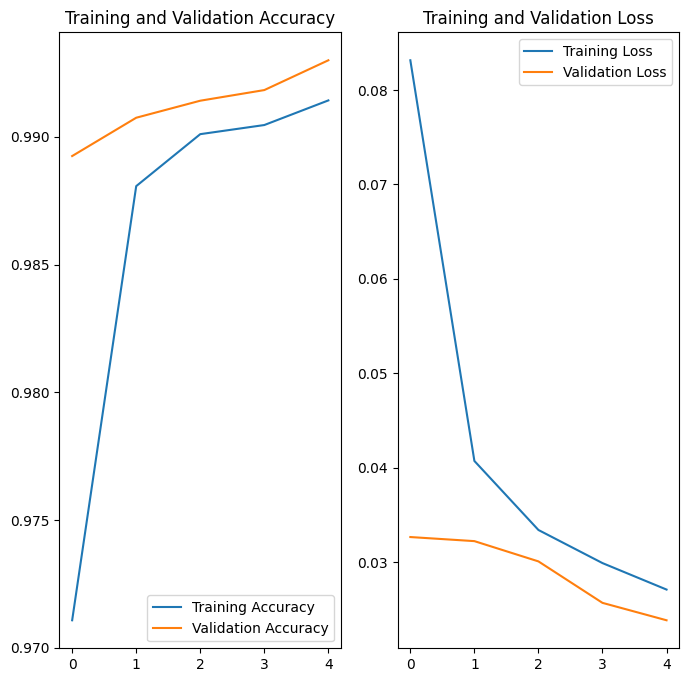

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:



concrete_url = "https://images.unsplash.com/photo-1617713965103-9fda56c89fad?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8Y29uY3JldGUlMjB0ZXh0dXJlfGVufDB8fDB8fA%3D%3D&w=1000&q=80"
concrete_path = tf.keras.utils.get_file('concrete_crack', origin=concrete_url)

img = tf.keras.utils.load_img(
    concrete_path, color_mode='grayscale', target_size=(img_size, img_size)
)
img_array = tf.keras.utils.img_to_array(img)
print(img_array.shape)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
print(X.shape)

# plt.imshow(img, cmap="gray")
# plt.show()



# predictions = model.predict(img_array)
# print(predictions)
# score = tf.nn.softmax(predictions[0])
# print(score)
# print(np.max(score))

(200, 200, 1)
(1, 200, 200, 1)
(40000, 50, 50, 1)
